## **Setting Folders**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
print(os.getcwd())  # Prints the current working directory

/content/drive/My Drive/DL_Project/BraTs2020_extracted


In [ ]:
# List files in a specific folder
folder_path = "/content/drive/My Drive/DL_Project/BraTs2020_extracted/"
print("Files in folder:", os.listdir(folder_path))

Files in folder: ['BraTS2020_TrainingData', 'BraTS2020_ValidationData', 'Final_project_training.log', 'best_model_final_project.keras', 'Final_Project_results', 'Old_models', 'Final_Project_4c_results', 'Model2_attention_results', 'model2_attention.log', 'Model4_aug_filters', 'Model5_3d_unet', 'model.png', 'Best_model_model2.keras', 'best_model4.keras', 'model4_aug_filt.log', 'model_.28-0.019331.weights.h5', 'model_.40-0.020782.weights.h5', 'model_.34-0.026693.weights.h5']


In [ ]:
# Change directory
os.chdir(folder_path)

# Confirm new working directory
print("Now working in:", os.getcwd())

Now working in: /content/drive/My Drive/DL_Project/BraTs2020_extracted


In [ ]:
print(os.getcwd())  # Prints the current working directory

/content/drive/My Drive/DL_Project/BraTs2020_extracted


## **Libraries**

In [ ]:
pip install pydot

In [ ]:
pip install opencv-python-headless

In [ ]:
pip install nibabel

In [ ]:
pip install tensorflow

In [ ]:
import nibabel as nib
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
import cv2
import tensorflow as tf
import keras
import keras.backend as K

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from skimage.transform import rotate
from skimage.util import montage
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.layers import Rescaling, Resizing, RandomFlip, RandomRotation
from keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import Callback

## **Preprocessing Data**

In [ ]:
TRAIN_DATASET_PATH = "/content/drive/My Drive/DL_Project/BraTs2020_extracted/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/"

In [ ]:
# Print files
print("Files in directory:", len(os.listdir(TRAIN_DATASET_PATH)), os.listdir(TRAIN_DATASET_PATH))

Files in directory: 371 ['BraTS20_Training_001', 'BraTS20_Training_002', 'BraTS20_Training_003', 'BraTS20_Training_004', 'BraTS20_Training_005', 'BraTS20_Training_006', 'BraTS20_Training_007', 'BraTS20_Training_008', 'BraTS20_Training_009', 'BraTS20_Training_010', 'BraTS20_Training_011', 'BraTS20_Training_012', 'BraTS20_Training_013', 'BraTS20_Training_014', 'BraTS20_Training_015', 'BraTS20_Training_016', 'BraTS20_Training_017', 'BraTS20_Training_018', 'BraTS20_Training_019', 'BraTS20_Training_020', 'BraTS20_Training_021', 'BraTS20_Training_022', 'BraTS20_Training_023', 'BraTS20_Training_024', 'BraTS20_Training_025', 'BraTS20_Training_026', 'BraTS20_Training_027', 'BraTS20_Training_028', 'BraTS20_Training_029', 'BraTS20_Training_030', 'BraTS20_Training_031', 'BraTS20_Training_032', 'BraTS20_Training_033', 'BraTS20_Training_034', 'BraTS20_Training_035', 'BraTS20_Training_036', 'BraTS20_Training_037', 'BraTS20_Training_038', 'BraTS20_Training_039', 'BraTS20_Training_040', 'BraTS20_Traini

In [ ]:
old_name = TRAIN_DATASET_PATH + "BraTS20_Training_355/W39_1998.09.19_Segm.nii"
new_name = TRAIN_DATASET_PATH + "BraTS20_Training_355/BraTS20_Training_355_seg.nii"

# renaming the file
try:
    os.rename(old_name, new_name)
    print("File has been re-named successfully!")
except:
    print("File is already renamed!")

File is already renamed!


In [ ]:
# load .nii file as a numpy array
test_image_flair = nib.load(TRAIN_DATASET_PATH + "BraTS20_Training_355/BraTS20_Training_355_flair.nii").get_fdata()
print("Shape: ", test_image_flair.shape)
print("Dtype: ", test_image_flair.dtype)

Shape:  (240, 240, 155)
Dtype:  float64


In [ ]:
print("Min: ", test_image_flair.min())
print("Max: ", test_image_flair.max())

Min:  0.0
Max:  1854.603271484375


In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Scale the test_image_flair array and then reshape it back to its original dimensions.
# This ensures the data is normalized/standardized for model input without altering its spatial structure.
test_image_flair = scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

In [ ]:
print("Min: ", test_image_flair.min())
print("Max: ", test_image_flair.max())

Min:  0.0
Max:  1.0


In [ ]:
# rescaling t1
test_image_t1 = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
test_image_t1 = scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

# rescaling t1ce
test_image_t1ce = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
test_image_t1ce = scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

# rescaling t2
test_image_t2 = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

# we will not rescale the mask
test_image_seg = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()

Slice Number: 95


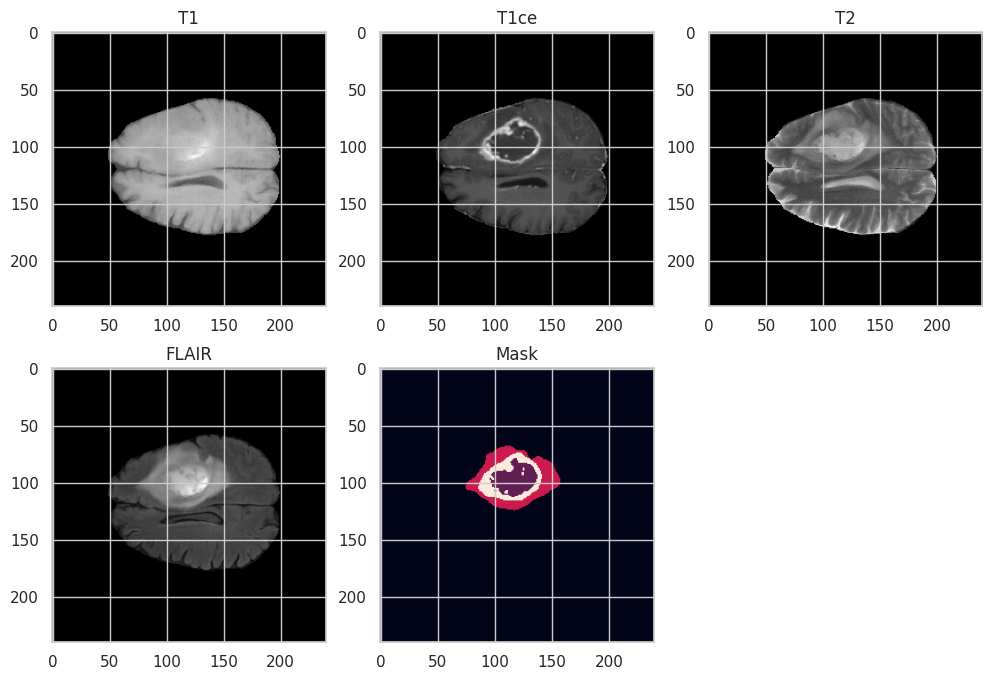

In [ ]:
slice = 95

print("Slice Number: " + str(slice))

plt.figure(figsize=(12, 8))

# T1
plt.subplot(2, 3, 1)
plt.imshow(test_image_t1[:,:,slice], cmap='gray')
plt.title('T1')

# T1ce
plt.subplot(2, 3, 2)
plt.imshow(test_image_t1ce[:,:,slice], cmap='gray')
plt.title('T1ce')

# T2
plt.subplot(2, 3, 3)
plt.imshow(test_image_t2[:,:,slice], cmap='gray')
plt.title('T2')

# Flair
plt.subplot(2, 3, 4)
plt.imshow(test_image_flair[:,:,slice], cmap='gray')
plt.title('FLAIR')

# Mask
plt.subplot(2, 3, 5)
plt.imshow(test_image_seg[:,:,slice])
plt.title('Mask')
plt.show()

In [ ]:
# Modality shape
print("Modality: ", test_image_t1.shape)

# Segmentation shape
print("Segmentation: ", test_image_seg.shape)

Modality:  (240, 240, 155)
Segmentation:  (240, 240, 155)


Slice number: 95


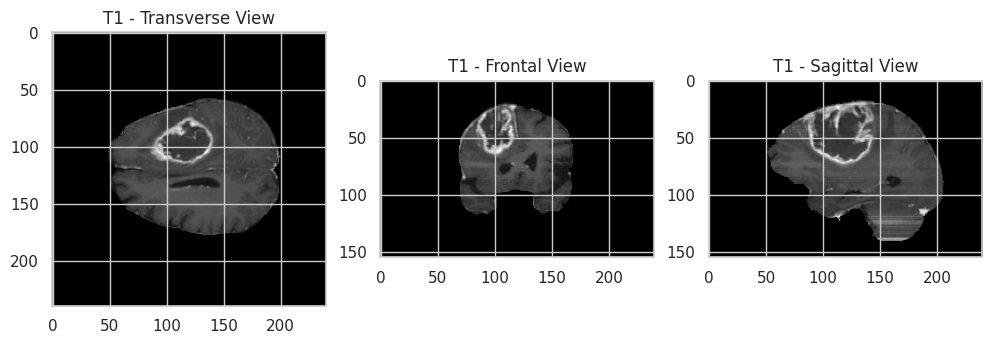

In [ ]:
slice = 95

print("Slice number: " + str(slice))

plt.figure(figsize=(12, 8))

# Apply a 90° rotation with an automatic resizing, otherwise the display is less obvious to analyze
# T1 - Transverse View
plt.subplot(1, 3, 1)
plt.imshow(test_image_t1ce[:,:,slice], cmap='gray')
plt.title('T1 - Transverse View')

# T1 - Frontal View
plt.subplot(1, 3, 2)
plt.imshow(rotate(test_image_t1ce[:,slice,:], 90, resize=True), cmap='gray')
plt.title('T1 - Frontal View')

# T1 - Sagittal View
plt.subplot(1, 3, 3)
plt.imshow(rotate(test_image_t1ce[slice,:,:], 90, resize=True), cmap='gray')
plt.title('T1 - Sagittal View')
plt.show()

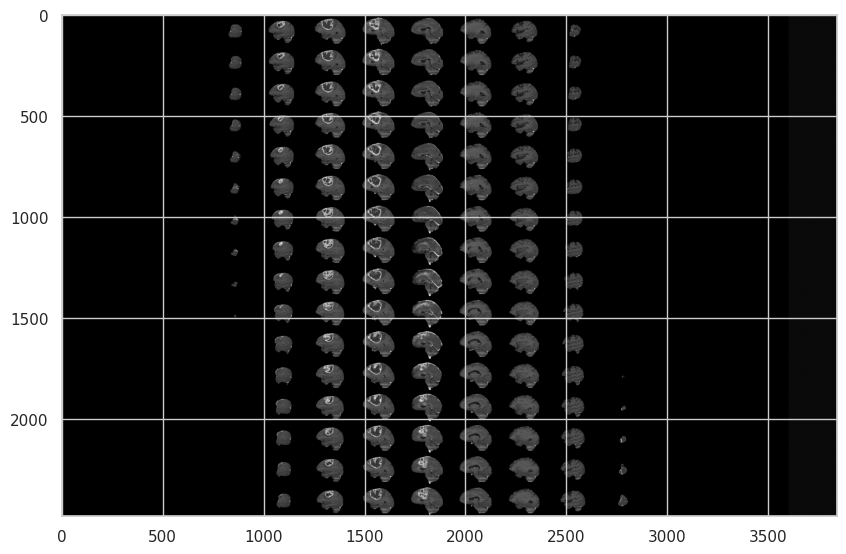

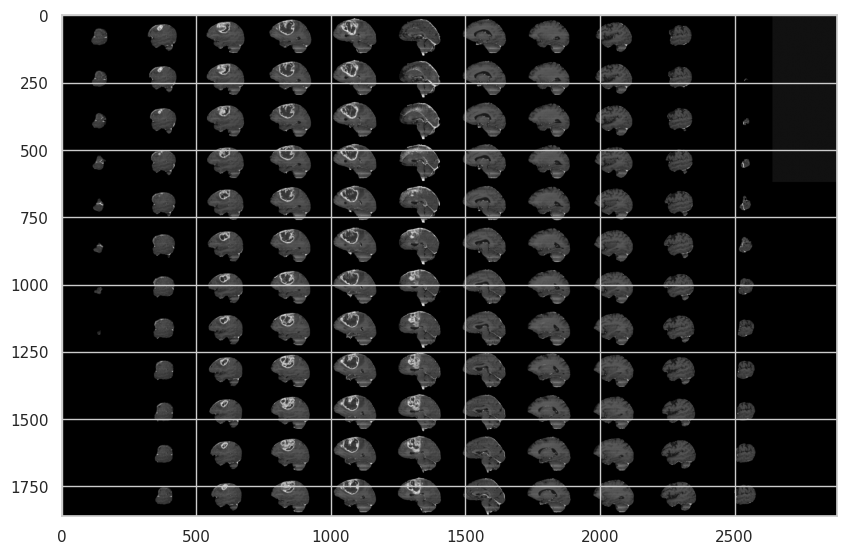

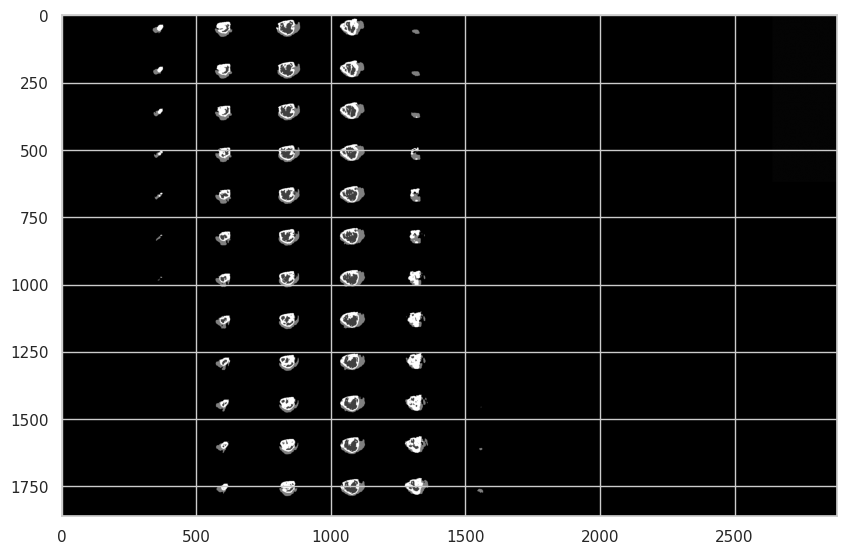

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)

# montage allows us to concatenate multiple images of the same size horizontally and vertically
plt.imshow(rotate(montage(test_image_t1ce[:,:,:]), 90, resize=True), cmap ='gray');

# Skip 50:-50 slices since there is not much to see
plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.imshow(rotate(montage(test_image_t1ce[50:-50,:,:]), 90, resize=True), cmap ='gray');

# Skip 50:-50 slices since there is not much to see
plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.imshow(rotate(montage(test_image_seg[50:-50,:,:]), 90, resize=True), cmap ='gray');

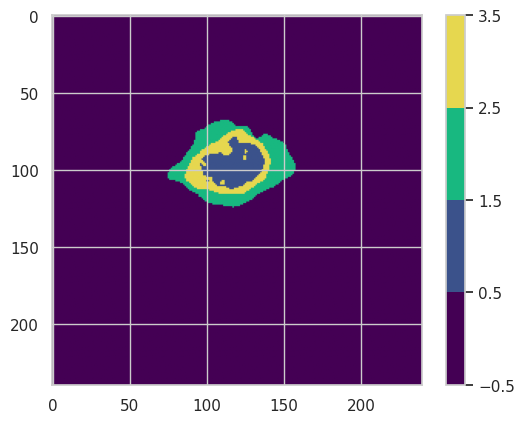

In [ ]:
# Plotting the segmantation
cmap = matplotlib.colors.ListedColormap(['#440054', '#3b528b', '#18b880', '#e6d74f'])
norm = matplotlib.colors.BoundaryNorm([-0.5, 0.5, 1.5, 2.5, 3.5], cmap.N)

# plotting the 95th slice
plt.imshow(test_image_seg[:,:,95], cmap=cmap, norm=norm)
plt.colorbar()
plt.show()

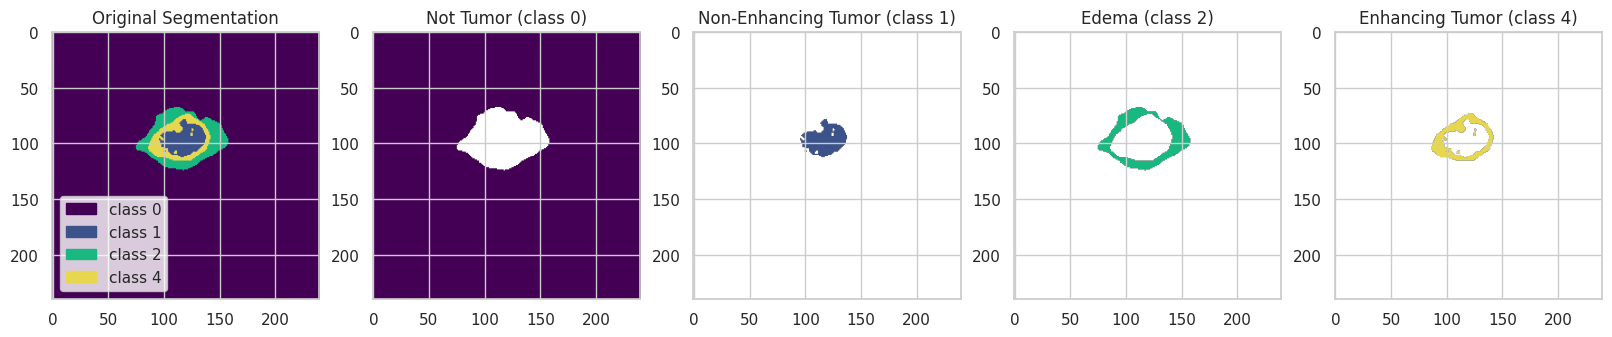

In [ ]:
# Isolation of class 0
seg_0 = test_image_seg.copy()
seg_0[seg_0 != 0] = np.nan

# Isolation of class 1
seg_1 = test_image_seg.copy()
seg_1[seg_1 != 1] = np.nan

# Isolation of class 2
seg_2 = test_image_seg.copy()
seg_2[seg_2 != 2] = np.nan

# Isolation of class 4
seg_4 = test_image_seg.copy()
seg_4[seg_4 != 4] = np.nan

# Define legend
class_names = ['class 0', 'class 1', 'class 2', 'class 4']
legend = [plt.Rectangle((0, 0), 1, 1, color=cmap(i), label=class_names[i]) for i in range(len(class_names))]

fig, ax = plt.subplots(1, 5, figsize=(20, 20))

ax[0].imshow(test_image_seg[:,:, slice], cmap=cmap, norm=norm)
ax[0].set_title('Original Segmentation')
ax[0].legend(handles=legend, loc='lower left')

ax[1].imshow(seg_0[:,:, slice], cmap=cmap, norm=norm)
ax[1].set_title('Not Tumor (class 0)')

ax[2].imshow(seg_1[:,:, slice], cmap=cmap, norm=norm)
ax[2].set_title('Non-Enhancing Tumor (class 1)')

ax[3].imshow(seg_2[:,:, slice], cmap=cmap, norm=norm)
ax[3].set_title('Edema (class 2)')

ax[4].imshow(seg_4[:,:, slice], cmap=cmap, norm=norm)
ax[4].set_title('Enhancing Tumor (class 4)')

plt.show()

In [ ]:
'''
from collections import Counter

# Define segmentation classes
SEGMENT_CLASSES = {
    0: "NOT tumor",
    1: "NECROTIC/CORE",
    2: "EDEMA",
    3: "ENHANCING"
}

def check_class_imbalance(data_generator, num_batches=10):
    """
    Analyzes the distribution of segmentation classes in the dataset.

    :param data_generator: A Keras data generator (training, validation, or test)
    :param num_batches: Number of batches to process (to reduce computation time)
    """
    total_counts = Counter()

    for batch_idx in range(num_batches):
        X_batch, Y_batch = data_generator.__getitem__(batch_idx)  # Get batch
        y_flat = np.argmax(Y_batch, axis=-1).flatten()  # Convert one-hot encoding to class labels

        # Count occurrences of each class
        batch_counts = Counter(y_flat)
        total_counts.update(batch_counts)

    # Normalize to get percentages
    total_pixels = sum(total_counts.values())
    class_percentages = {SEGMENT_CLASSES[k]: (v / total_pixels) * 100 for k, v in total_counts.items()}

    # Print class distribution
    print("\n Class Distribution (Percentage of Pixels):")
    for cls, percent in class_percentages.items():
        print(f" - {cls}: {percent:.2f}%")

    # Plot the class distribution
    plt.figure(figsize=(8, 5))
    plt.bar(class_percentages.keys(), class_percentages.values(), color=['blue', 'red', 'green', 'orange'])
    plt.ylabel("Percentage of Pixels")
    plt.xlabel("Class")
    plt.title("Class Distribution in Segmentation Masks")
    plt.xticks(rotation=15)
    plt.show()

# Run the function on the training data
check_class_imbalance(training_generator, num_batches=10)
'''

'\nfrom collections import Counter\n\n# Define segmentation classes\nSEGMENT_CLASSES = {\n    0: "NOT tumor",\n    1: "NECROTIC/CORE",\n    2: "EDEMA",\n    3: "ENHANCING"\n}\n\ndef check_class_imbalance(data_generator, num_batches=10):\n    """\n    Analyzes the distribution of segmentation classes in the dataset.\n\n    :param data_generator: A Keras data generator (training, validation, or test)\n    :param num_batches: Number of batches to process (to reduce computation time)\n    """\n    total_counts = Counter()\n\n    for batch_idx in range(num_batches):\n        X_batch, Y_batch = data_generator.__getitem__(batch_idx)  # Get batch\n        y_flat = np.argmax(Y_batch, axis=-1).flatten()  # Convert one-hot encoding to class labels\n\n        # Count occurrences of each class\n        batch_counts = Counter(y_flat)\n        total_counts.update(batch_counts)\n\n    # Normalize to get percentages\n    total_pixels = sum(total_counts.values())\n    class_percentages = {SEGMENT_CLASSE

## **Split Dataset**


In [ ]:
# lists of directories with studies
train_and_val_directories = [f.path for f in os.scandir(TRAIN_DATASET_PATH) if f.is_dir()]

def pathListIntoIds(dirList):
    x = []
    for i in range(0,len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x

train_and_test_ids = pathListIntoIds(train_and_val_directories);

train_test_ids, val_ids = train_test_split(train_and_test_ids,test_size=0.15)
train_ids, test_ids = train_test_split(train_test_ids,test_size=0.15)

In [ ]:
# Print data distribution (Train: 68%, Test: 12%, Val: 20%)
print(f"Train length: {len(train_ids)}")
print(f"Validation length: {len(val_ids)}")
print(f"Test length: {len(test_ids)}")

Train length: 266
Validation length: 56
Test length: 47


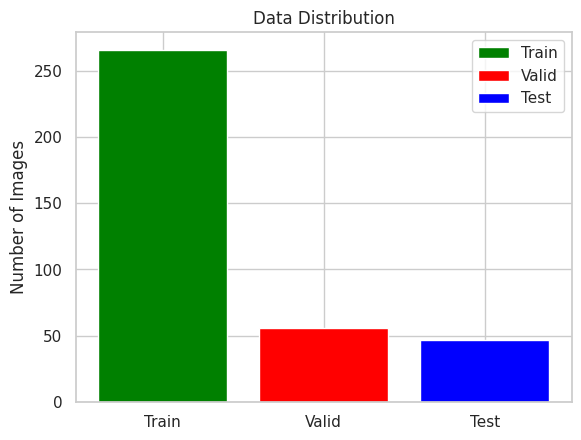

In [ ]:
plt.bar(["Train","Valid","Test"],
        [len(train_ids), len(val_ids), len(test_ids)],
        align='center',
        color=[ 'green','red', 'blue'],
        label=["Train", "Valid", "Test"]
       )

plt.legend()

plt.ylabel('Number of Images')
plt.title('Data Distribution')

plt.show()

## **Data Generator**

In [ ]:
# Define seg-areas
SEGMENT_CLASSES = {
    0 : 'NOT tumor',
    1 : 'NECROTIC/CORE', # or NON-ENHANCING tumor CORE
    2 : 'EDEMA',
    3 : 'ENHANCING' # original 4 -> converted into 3
}

# Select Slices and Image Size
VOLUME_SLICES = 100
VOLUME_START_AT = 22 # first slice of volume that we will include
IMG_SIZE = 128

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, dim=(IMG_SIZE, IMG_SIZE), batch_size=1, n_channels=2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __iter__(self):
        'Make it an iterable'
        return self

    def __next__(self):
        for i in range(len(self)):
            yield self[i]

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        # Find list of IDs
        Batch_ids = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(Batch_ids)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, Batch_ids):
        'Generates data containing batch_size samples'
        # ✅ Ensure `self.dim` is a tuple
        if not isinstance(self.dim, tuple):
          self.dim = (self.dim, self.dim)

        # Initialization
        X = np.zeros((self.batch_size * VOLUME_SLICES, *self.dim, self.n_channels))
        y = np.zeros((self.batch_size * VOLUME_SLICES, 240, 240))

        # Generate data
        for c, i in enumerate(Batch_ids):
            case_path = os.path.join(TRAIN_DATASET_PATH, i)

            # Load FLAIR
            data_path = os.path.join(case_path, f'{i}_flair.nii')
            flair = nib.load(data_path).get_fdata()

            # Load T1CE
            data_path = os.path.join(case_path, f'{i}_t1ce.nii')
            t1ce = nib.load(data_path).get_fdata()

            # Load segmentation mask
            data_path = os.path.join(case_path, f'{i}_seg.nii')
            seg = nib.load(data_path).get_fdata()

            for j in range(VOLUME_SLICES):
                X[j + VOLUME_SLICES * c, :, :, 0] = cv2.resize(flair[:, :, j + VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))
                X[j + VOLUME_SLICES * c, :, :, 1] = cv2.resize(t1ce[:, :, j + VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))
                # Keep the raw segmentation mask (still 240x240) for now
                y[j + VOLUME_SLICES * c] = seg[:, :, j + VOLUME_START_AT]

        # Debug: Print unique values before processing
        #print("Unique values in y before one-hot encoding:", np.unique(y))

        # Replace label 4 with 3 for consistency
        y[y == 4] = 3
        #print("Unique values in y after replacing 4 → 3:", np.unique(y))

        # Resize segmentation masks
        y_resized = np.zeros((y.shape[0], IMG_SIZE, IMG_SIZE), dtype=y.dtype)
        for idx in range(y.shape[0]):
            y_resized[idx] = cv2.resize(y[idx].astype(np.uint8), (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST)

        # One-hot encode the resized mask
        mask = tf.one_hot(y_resized, depth=4)
        Y_final = tf.convert_to_tensor(mask.numpy(), dtype=tf.float32)  # Ensure tensor format

        #print("New shape of one-hot encoded Y:", Y_final.shape)

        # Return normalized X and processed Y
        return tf.convert_to_tensor(X / (np.max(X) + 1e-8), dtype=tf.float32), Y_final

# Define batch size
BATCH_SIZE = 1  # You can adjust this value

# Update the DataGenerator initialization
training_generator = DataGenerator(train_ids, batch_size=BATCH_SIZE)
valid_generator = DataGenerator(val_ids, batch_size=BATCH_SIZE)
test_generator = DataGenerator(test_ids, batch_size=BATCH_SIZE)

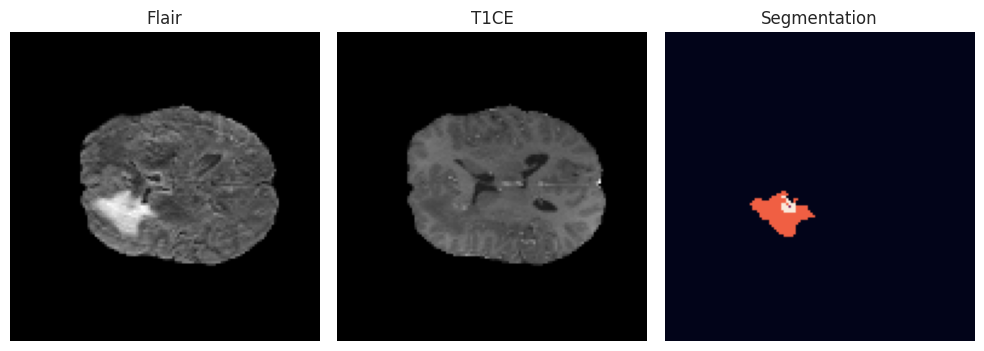

In [ ]:
# Define a function to display one slice and its segmentation
def display_slice_and_segmentation(flair, t1ce, segmentation):
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))

    axes[0].imshow(flair, cmap='gray')
    axes[0].set_title('Flair')
    axes[0].axis('off')

    axes[1].imshow(t1ce, cmap='gray')
    axes[1].set_title('T1CE')
    axes[1].axis('off')

    axes[2].imshow(segmentation) # Displaying segmentation
    axes[2].set_title('Segmentation')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()


# Retrieve the batch from the training generator
X_batch, Y_batch = training_generator[8]

# Extract Flair, T1CE, and segmentation from the batch
flair_batch = X_batch[:, :, :, 0]
t1ce_batch = X_batch[:, :, :, 1]
segmentation_batch = np.argmax(Y_batch, axis=-1)  # Convert one-hot encoded to categorical

# Extract the 50th slice from Flair, T1CE, and segmentation
slice_index = 60  # Indexing starts from 0
slice_flair = flair_batch[slice_index]
slice_t1ce = t1ce_batch[slice_index]
slice_segmentation = segmentation_batch[slice_index]

# Display the 50th slice and its segmentation
display_slice_and_segmentation(slice_flair, slice_t1ce, slice_segmentation)

## **Loss Function additional metrics**

In [ ]:
# dice loss as defined above for 4 classes
def dice_coef(y_true, y_pred, smooth=1e-6):
    class_num = 4  # Number of segmentation classes
    dice = 0

    for i in range(class_num):
        y_true_f = tf.cast(tf.reshape(y_true[:, :, :, i], [-1]), dtype=tf.float32)  # ✅ Convert to float32
        y_pred_f = tf.cast(tf.reshape(y_pred[:, :, :, i], [-1]), dtype=tf.float32)  # ✅ Convert to float32

        intersection = tf.reduce_sum(y_true_f * y_pred_f)
        dice += (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

    return dice / class_num  # Average dice score over classes

'''
def dice_loss(y_true, y_pred, smooth=1e-6):
    class_num = 4  # Number of segmentation classes
    dice = 0

    for i in range(class_num):
        y_true_f = tf.cast(tf.reshape(y_true[:, :, :, i], [-1]), dtype=tf.float32)
        y_pred_f = tf.cast(tf.reshape(y_pred[:, :, :, i], [-1]), dtype=tf.float32)

        intersection = tf.reduce_sum(y_true_f * y_pred_f)
        dice += (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

    return 1 - (dice / class_num)  # Dice Loss (1 - Dice Score)
'''

'\ndef dice_loss(y_true, y_pred, smooth=1e-6):\n    class_num = 4  # Number of segmentation classes\n    dice = 0\n\n    for i in range(class_num):\n        y_true_f = tf.cast(tf.reshape(y_true[:, :, :, i], [-1]), dtype=tf.float32)\n        y_pred_f = tf.cast(tf.reshape(y_pred[:, :, :, i], [-1]), dtype=tf.float32)\n\n        intersection = tf.reduce_sum(y_true_f * y_pred_f)\n        dice += (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)\n\n    return 1 - (dice / class_num)  # Dice Loss (1 - Dice Score)\n'

In [ ]:
# Define per class evaluation of dice coef
def dice_coef_necrotic(y_true, y_pred, epsilon=1e-6):
    intersection = tf.reduce_sum(tf.abs(y_true[:,:,:,1] * y_pred[:,:,:,1]))
    return (2. * intersection) / (tf.reduce_sum(tf.square(y_true[:,:,:,1])) + tf.reduce_sum(tf.square(y_pred[:,:,:,1])) + epsilon)

def dice_coef_edema(y_true, y_pred, epsilon=1e-6):
    intersection = tf.reduce_sum(tf.abs(y_true[:,:,:,2] * y_pred[:,:,:,2]))
    return (2. * intersection) / (tf.reduce_sum(tf.square(y_true[:,:,:,2])) + tf.reduce_sum(tf.square(y_pred[:,:,:,2])) + epsilon)

def dice_coef_enhancing(y_true, y_pred, epsilon=1e-6):
    intersection = tf.reduce_sum(tf.abs(y_true[:,:,:,3] * y_pred[:,:,:,3]))
    return (2. * intersection) / (tf.reduce_sum(tf.square(y_true[:,:,:,3])) + tf.reduce_sum(tf.square(y_pred[:,:,:,3])) + epsilon)

In [ ]:
# Computing Precision
def precision(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  # Ensure float32
    y_pred = tf.cast(y_pred, tf.float32)  # Ensure float32

    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))

    return true_positives / (predicted_positives + tf.keras.backend.epsilon())


# Computing Sensitivity
def sensitivity(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))

    return true_positives / (possible_positives + tf.keras.backend.epsilon())



# Computing Specificity
def specificity(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    true_negatives = tf.reduce_sum(tf.round(tf.clip_by_value((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = tf.reduce_sum(tf.round(tf.clip_by_value(1 - y_true, 0, 1)))

    return true_negatives / (possible_negatives + tf.keras.backend.epsilon())


def sensitivity_tumor(y_true, y_pred):
    y_true = tf.cast(y_true[:, :, :, 1:], tf.float32)  # Exclude background class
    y_pred = tf.cast(y_pred[:, :, :, 1:], tf.float32)

    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))

    return true_positives / (possible_positives + tf.keras.backend.epsilon())

def precision_tumor(y_true, y_pred):
    y_true = tf.cast(y_true[:, :, :, 1:], tf.float32)  # Exclude background
    y_pred = tf.cast(y_pred[:, :, :, 1:], tf.float32)

    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))

    return true_positives / (predicted_positives + tf.keras.backend.epsilon())


def specificity_tumor(y_true, y_pred):
    y_true = tf.cast(y_true[:, :, :, 1:], tf.float32)  # Exclude background
    y_pred = tf.cast(y_pred[:, :, :, 1:], tf.float32)

    true_negatives = tf.reduce_sum(tf.round(tf.clip_by_value((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = tf.reduce_sum(tf.round(tf.clip_by_value(1 - y_true, 0, 1)))

    return true_negatives / (possible_negatives + tf.keras.backend.epsilon())


## **Model**

In [ ]:
def build_unet(inputs, ker_init, dropout):
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(inputs)
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv1)

    pool = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool)
    conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)

    pool1 = MaxPooling2D(pool_size=(2, 2))(conv)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv2)

    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv3)


    pool4 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool4)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv5)
    drop5 = Dropout(dropout)(conv5)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(drop5))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv9)

    up = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv9))
    merge = concatenate([conv1,up], axis = 3)
    conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge)
    conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)

    conv10 = Conv2D(4, (1,1), activation = 'softmax')(conv)

    return Model(inputs = inputs, outputs = conv10)

model = build_unet(input_layer, 'he_normal', 0.2)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 2)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 128, 128, 32)   │            608 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 128, 128, 32)   │          9,248 │ conv2d_23[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 64, 64, 32)     │              0 │ conv2d_24[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)        │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 64, 64, 64)     │         36,928 │ conv2d_25[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 32, 32, 64)     │              0 │ conv2d_26[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_27 (Conv2D)        │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 32, 32, 128)    │        147,584 │ conv2d_27[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 16, 16, 128)    │              0 │ conv2d_28[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_29 (Conv2D)        │ (None, 16, 16, 256)    │        295,168 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 16, 16, 256)    │        590,080 │ conv2d_29[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 8, 8, 256)      │              0 │ conv2d_30[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 8, 8, 512)      │      1,180,160 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_32 (Conv2D)        │ (None, 8, 8, 512)      │      2,359,808 │ conv2d_31[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 8, 8, 512)      │              0 │ conv2d_32[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_4           │ (None, 16, 16, 512)    │              0 │ dropout_1[0][0]        │
│ (UpSampling2D)            │                        │                │                        │
├──────────────────────

 Total params: 7,759,908 (29.60 MB)

 Trainable params: 7,759,908 (29.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
input_layer = Input((IMG_SIZE, IMG_SIZE, 2))

model = build_unet(input_layer, 'he_normal', 0.2)

model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        "accuracy",
        tf.keras.metrics.MeanIoU(num_classes=4),
        dice_coef,
        precision,
        precision_tumor,
        sensitivity,
        sensitivity_tumor,
        specificity,
        specificity_tumor,
        dice_coef_necrotic,
        dice_coef_edema,
        dice_coef_enhancing
    ]
)

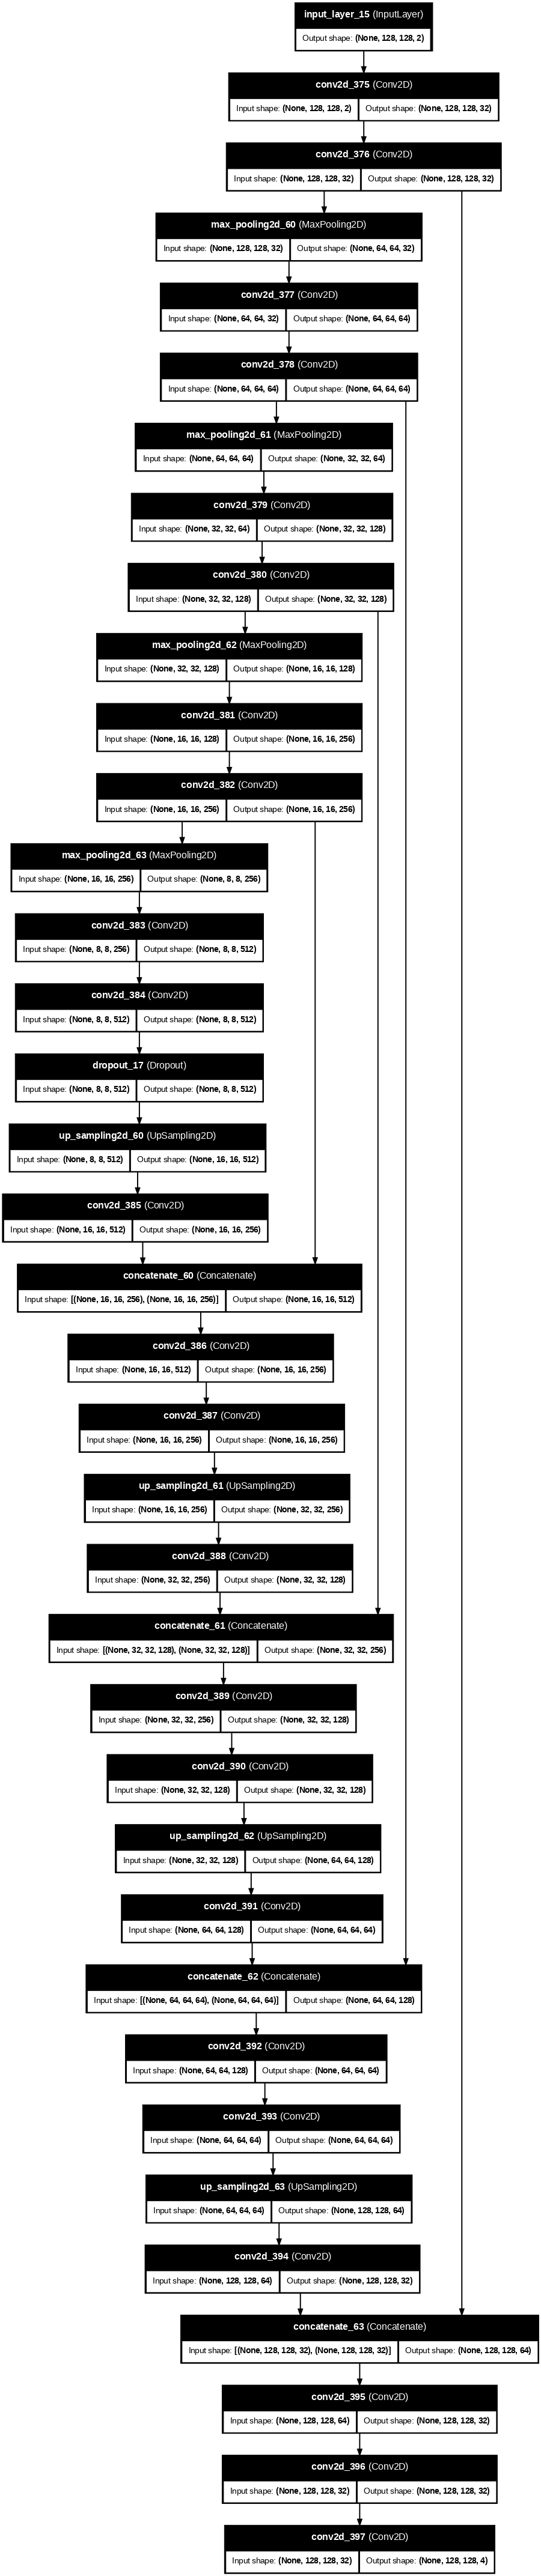

In [ ]:
plot_model(model,
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True,
           rankdir = 'TB',
           expand_nested = False,
           dpi = 70)

In [ ]:
'''
class CustomMetricsCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}

        # ✅ Train Metrics
        train_loss = logs.get("loss", 0)
        train_accuracy = logs.get("accuracy", 0)

        # ✅ Validation Metrics
        val_loss = logs.get("val_loss", 0)
        val_accuracy = logs.get("val_accuracy", 0)

        # ✅ Dice Coefficients
        dice_coef = logs.get("dice_coef", 0)
        dice_necrotic = logs.get("dice_coef_necrotic", 0)
        dice_edema = logs.get("dice_coef_edema", 0)
        dice_enhancing = logs.get("dice_coef_enhancing", 0)

        val_dice_coef = logs.get("val_dice_coef", 0)
        val_dice_necrotic = logs.get("val_dice_coef_necrotic", 0)
        val_dice_edema = logs.get("val_dice_coef_edema", 0)
        val_dice_enhancing = logs.get("val_dice_coef_enhancing", 0)

        # ✅ Print Results
        print(
            f"Epoch {epoch + 1}: "
            f"[Train] loss: {train_loss:.4f} | accuracy: {train_accuracy:.4f} | "
            f"Dice: {dice_coef:.4f} | Necrotic: {dice_necrotic:.4f} | "
            f"Edema: {dice_edema:.4f} | Enhancing: {dice_enhancing:.4f}\n"
            f"         [Validation] loss: {val_loss:.4f} | accuracy: {val_accuracy:.4f} | "
            f"Dice: {val_dice_coef:.4f} | Necrotic: {val_dice_necrotic:.4f} | "
            f"Edema: {val_dice_edema:.4f} | Enhancing: {val_dice_enhancing:.4f}\n"
        )



# Define the custom callback to print train, validation, and test accuracy every epoch
class CleanOutputCallback(Callback):
    def __init__(self, test_data):
        super().__init__()
        self.test_data = test_data  # ✅ Store test data generator

    def on_epoch_begin(self, epoch, logs=None):
        print(f"\nEpoch {epoch + 1}/{self.params['epochs']}")

    def on_epoch_end(self, epoch, logs=None):
        log_msg = f"Epoch {epoch + 1}:"

        # ✅ Train Metrics
        log_msg += f" [Train] loss: {logs['loss']:.4f} | accuracy: {logs['accuracy']:.4f} |"

        # ✅ Validation Metrics
        if "val_loss" in logs and "val_accuracy" in logs:
            log_msg += f" [Validation] loss: {logs['val_loss']:.4f} | accuracy: {logs['val_accuracy']:.4f} |"

        # ✅ Evaluate on Test Set
        test_loss, test_accuracy = self.model.evaluate(self.test_data, verbose=0)
        log_msg += f" [Test] loss: {test_loss:.4f} | accuracy: {test_accuracy:.4f} |"

        # ✅ Add Other Metrics
        extra_metrics = ["mean_io_u", "dice_coef", "precision", "sensitivity", "specificity",
                         "dice_coef_necrotic", "dice_coef_edema", "dice_coef_enhancing"]

        for metric in extra_metrics:
            if metric in logs and f"val_{metric}" in logs:
                log_msg += f" {metric}: {logs[metric]:.4f} | val_{metric}: {logs[f'val_{metric}']:.4f} |"

        print(log_msg)
'''

# Add to callbacks
callbacks = [
      keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                            patience=2, min_lr=0.000001, verbose=1),
      keras.callbacks.ModelCheckpoint(filepath = 'model_.{epoch:02d}-{val_loss:.6f}.weights.h5',
                          verbose=1, save_best_only=True, save_weights_only = True),
      CSVLogger('training.log', separator=',', append=False)
    ]


'''
callbacks = [
    CustomMetricsCallback(),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.000001, verbose=1),
    keras.callbacks.ModelCheckpoint(filepath='model_.{epoch:02d}-{val_loss:.6f}.weights.h5', verbose=1, save_best_only=True, save_weights_only=True),
    CSVLogger('training.log', separator=',', append=False)
]
'''

"\ncallbacks = [\n    CustomMetricsCallback(),\n    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.000001, verbose=1),\n    keras.callbacks.ModelCheckpoint(filepath='model_.{epoch:02d}-{val_loss:.6f}.weights.h5', verbose=1, save_best_only=True, save_weights_only=True),\n    CSVLogger('training.log', separator=',', append=False)\n]\n"

In [ ]:
history = model.fit(
    training_generator,
    epochs=40,
    steps_per_epoch=len(training_generator),
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    callbacks=callbacks,
    verbose=1  # 1 = Show progress bar with epoch summary, 2 = Silent batch logs
)


Epoch 1/40
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.9613 - dice_coef: 0.2472 - dice_coef_edema: 0.0763 - dice_coef_enhancing: 0.0269 - dice_coef_necrotic: 0.0271 - loss: 0.2756 - mean_io_u_10: 0.5286 - precision: 0.9454 - precision_tumor: 0.0000e+00 - sensitivity: 0.9020 - sensitivity_tumor: 0.0000e+00 - specificity: 0.9949 - specificity_tumor: 1.0000
Epoch 1: val_loss improved from inf to 0.07909, saving model to model_.01-0.079085.weights.h5
266/266 ━━━━━━━━━━━━━━━━━━━━ 187s 646ms/step - accuracy: 0.9614 - dice_coef: 0.2472 - dice_coef_edema: 0.0764 - dice_coef_enhancing: 0.0270 - dice_coef_necrotic: 0.0272 - loss: 0.2751 - mean_io_u_10: 0.5287 - precision: 0.9456 - precision_tumor: 0.0000e+00 - sensitivity: 0.9023 - sensitivity_tumor: 0.0000e+00 - specificity: 0.9949 - specificity_tumor: 1.0000 - val_accuracy: 0.9833 - val_dice_coef: 0.2647 - val_dice_coef_edema: 0.0731 - val_dice_coef_enhancing: 0.0133 - val_dice_coef_necrotic: 0.0231 - val_loss: 0.0791 - val_mean_i

## **Model Check metrics**

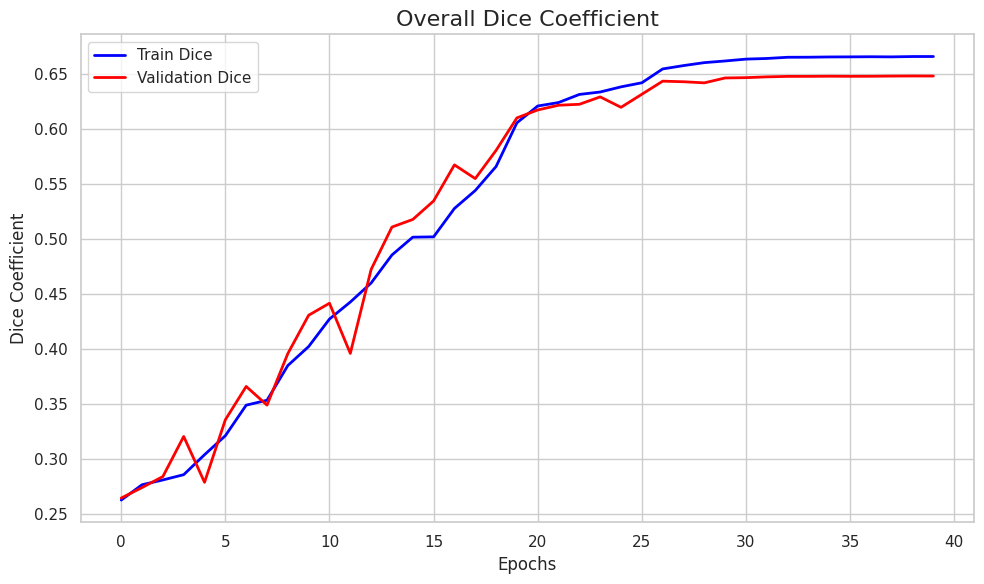

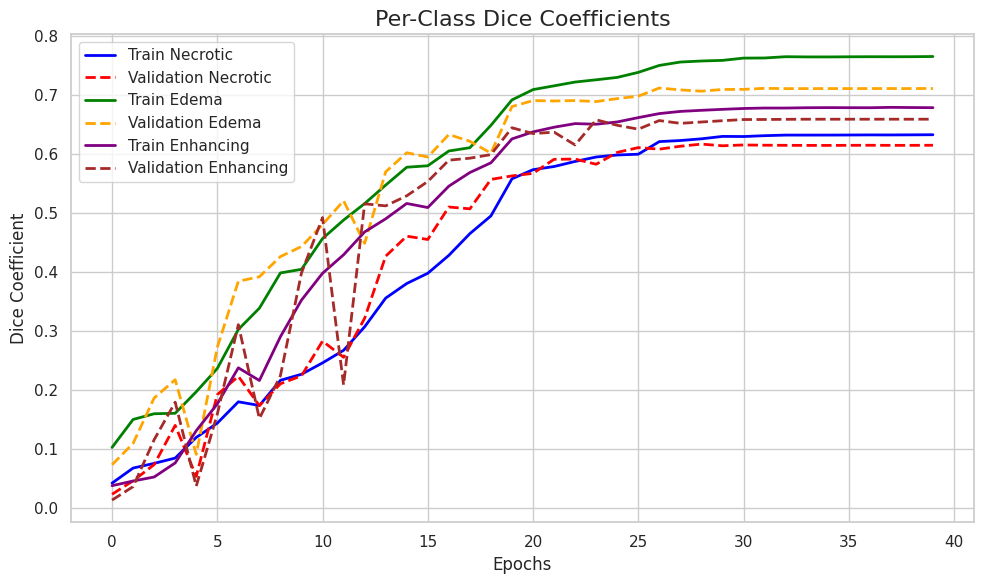

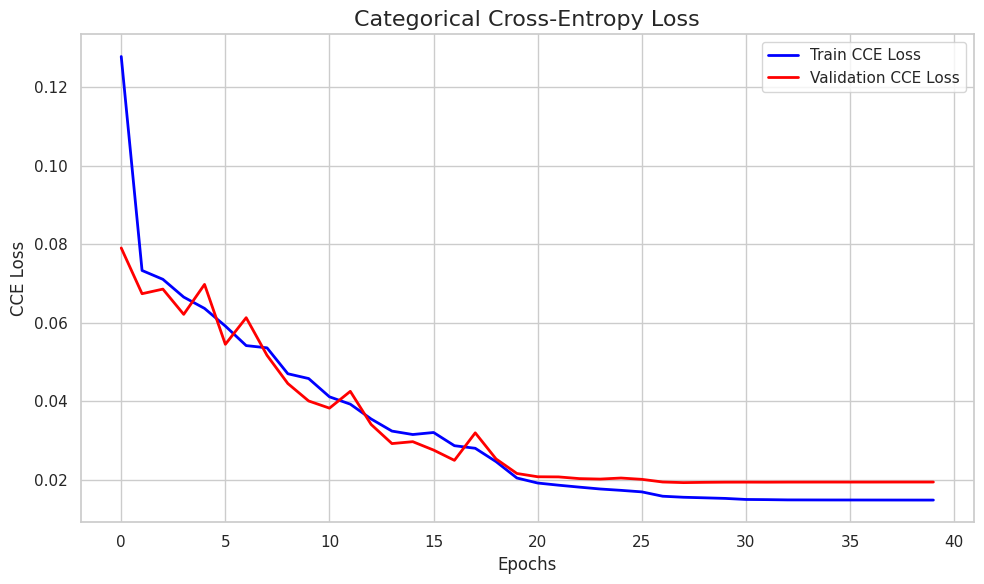

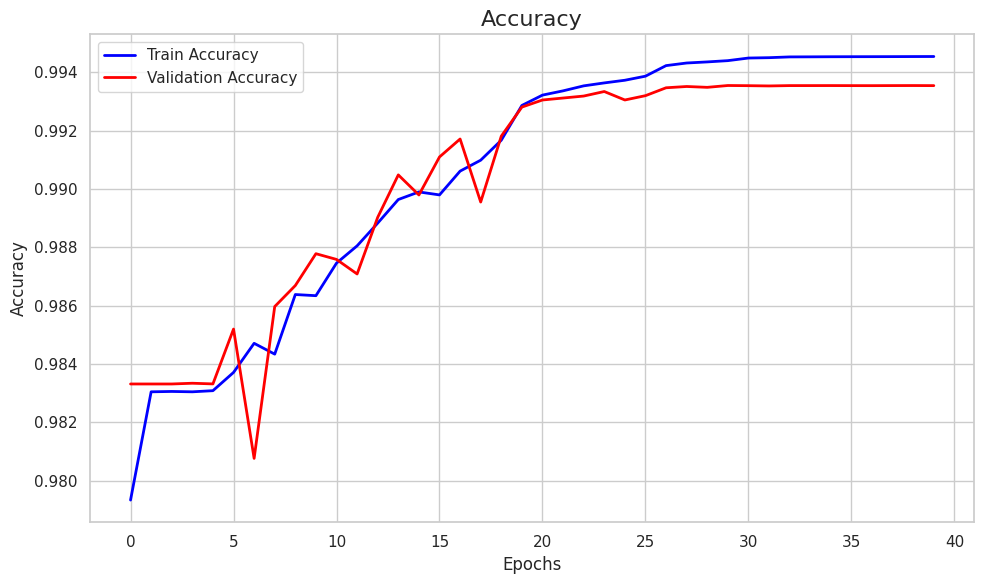

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load training history from CSV
history = pd.read_csv('Final_project_training.log', sep=',')

# Extract Epochs
epochs = range(len(history))

# Extract Dice Coefficients
train_dice = history["dice_coef"]
val_dice = history["val_dice_coef"]

# Per-Class Dice Coefficients
train_dice_necrotic = history["dice_coef_necrotic"]
val_dice_necrotic = history["val_dice_coef_necrotic"]
train_dice_edema = history["dice_coef_edema"]
val_dice_edema = history["val_dice_coef_edema"]
train_dice_enhancing = history["dice_coef_enhancing"]
val_dice_enhancing = history["val_dice_coef_enhancing"]

# Extract Categorical Cross-Entropy Loss
train_cce_loss = history["loss"]  # Assuming column name is 'loss'
val_cce_loss = history["val_loss"]  # Extracting validation loss

# Extract Accuracy
train_accuracy = history["accuracy"]
val_accuracy = history["val_accuracy"]

# Set Seaborn style (ggplot-like style)
sns.set(style="whitegrid")

# Plot Overall Dice Coefficient
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_dice, label="Train Dice", color="blue", linewidth=2)
plt.plot(epochs, val_dice, label="Validation Dice", color="red", linewidth=2)
plt.title("Overall Dice Coefficient", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Dice Coefficient", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Per-Class Dice Coefficients
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_dice_necrotic, label="Train Necrotic", color="blue", linewidth=2)
plt.plot(epochs, val_dice_necrotic, label="Validation Necrotic", color="red", linestyle="--", linewidth=2)
plt.plot(epochs, train_dice_edema, label="Train Edema", color="green", linewidth=2)
plt.plot(epochs, val_dice_edema, label="Validation Edema", color="orange", linestyle="--", linewidth=2)
plt.plot(epochs, train_dice_enhancing, label="Train Enhancing", color="purple", linewidth=2)
plt.plot(epochs, val_dice_enhancing, label="Validation Enhancing", color="brown", linestyle="--", linewidth=2)
plt.title("Per-Class Dice Coefficients", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Dice Coefficient", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Categorical Cross-Entropy Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_cce_loss, label="Train CCE Loss", color="blue", linewidth=2)
plt.plot(epochs, val_cce_loss, label="Validation CCE Loss", color="red", linewidth=2)
plt.title("Categorical Cross-Entropy Loss", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("CCE Loss", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label="Train Accuracy", color="blue", linewidth=2)
plt.plot(epochs, val_accuracy, label="Validation Accuracy", color="red", linewidth=2)
plt.title("Accuracy", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


## **Model Predictions**

In [ ]:
weights_path = "model_.28-0.019331.weights.h5"  # Your model filename
if os.path.exists(weights_path):
    print("File exists:", weights_path)
else:
    print("File NOT found!")

File exists: model_.28-0.019331.weights.h5


In [ ]:
print("Available files in directory:", os.listdir("."))

Available files in directory: ['BraTS2020_TrainingData', 'BraTS2020_ValidationData', 'Final_project_training.log', 'best_model_final_project.keras', 'Final_Project_results', 'Old_models', 'Final_Project_4c_results', 'Model2_attention_results', 'model2_attention.log', 'Model4_aug_filters', 'Model5_3d_unet', 'model.png', 'Best_model_model2.keras', 'best_model4.keras', 'model4_aug_filt.log', 'model_.28-0.019331.weights.h5', 'model_.40-0.020782.weights.h5', 'model_.34-0.026693.weights.h5']


In [ ]:
# Compile a model and load our saved weights
IMG_SIZE = 128
input_layer = Input((IMG_SIZE, IMG_SIZE, 2))

best_saved_model = build_unet(input_layer, 'he_normal', 0.2)

best_saved_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy',tf.keras.metrics.MeanIoU(num_classes=4), dice_coef, precision, sensitivity, specificity, dice_coef_necrotic, dice_coef_edema, dice_coef_enhancing])

best_saved_model.load_weights(weights_path)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 94 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
best_saved_model.load_weights(weights_path)

# Recompile to reset optimizer state
best_saved_model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=4),
             dice_coef, precision, sensitivity, specificity,
             dice_coef_necrotic, dice_coef_edema, dice_coef_enhancing]
)

print("Weights loaded and model recompiled.")

Weights loaded and model recompiled.


In [ ]:
# Save entire model (structure + weights + optimizer)
best_saved_model.save("best_model.keras")

# Later, reload everything (including optimizer)
best_saved_model = keras.models.load_model(
    "best_model.keras",
    custom_objects={"dice_coef": dice_coef, "precision": precision, "sensitivity": sensitivity, "specificity": specificity, "dice_coef_necrotic": dice_coef_necrotic, "dice_coef_edema": dice_coef_edema, "dice_coef_enhancing": dice_coef_enhancing}
)

print("Full model loaded successfully.")

Full model loaded successfully.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 94 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
def imageLoader(path):
    image = nib.load(path).get_fdata()
    X = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, self.n_channels))
    for j in range(VOLUME_SLICES):
        X[j +VOLUME_SLICES*c,:,:,0] = cv2.resize(image[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));
        X[j +VOLUME_SLICES*c,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));

        y[j +VOLUME_SLICES*c] = seg[:,:,j+VOLUME_START_AT];
    return np.array(image)

In [ ]:
def loadDataFromDir(path, list_of_files, mriType, n_images):
    scans = []
    masks = []
    for i in list_of_files[:n_images]:
        fullPath = glob.glob( i + '/*'+ mriType +'*')[0]
        currentScanVolume = imageLoader(fullPath)
        currentMaskVolume = imageLoader( glob.glob( i + '/*seg*')[0] )
        # for each slice in 3D volume, find also it's mask
        for j in range(0, currentScanVolume.shape[2]):
            scan_img = cv2.resize(currentScanVolume[:,:,j], dsize=(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA).astype('uint8')
            mask_img = cv2.resize(currentMaskVolume[:,:,j], dsize=(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA).astype('uint8')
            scans.append(scan_img[..., np.newaxis])
            masks.append(mask_img[..., np.newaxis])
    return np.array(scans, dtype='float32'), np.array(masks, dtype='float32')

In [ ]:
def predictByPath(case_path,case):
    files = next(os.walk(case_path))[2]
    X = np.empty((VOLUME_SLICES, IMG_SIZE, IMG_SIZE, 2))

    vol_path = os.path.join(case_path, f'BraTS20_Training_{case}_flair.nii');
    flair=nib.load(vol_path).get_fdata()

    vol_path = os.path.join(case_path, f'BraTS20_Training_{case}_t1ce.nii');
    ce=nib.load(vol_path).get_fdata()


    for j in range(VOLUME_SLICES):
        X[j,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
        X[j,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))

    return model.predict(X/np.max(X), verbose=1)

In [ ]:
def showPredictsById(case, start_slice = 60):
    path = f"/content/drive/My Drive/DL_Project/BraTs2020_extracted/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_{case}"
    gt = nib.load(os.path.join(path, f'BraTS20_Training_{case}_seg.nii')).get_fdata()
    origImage = nib.load(os.path.join(path, f'BraTS20_Training_{case}_flair.nii')).get_fdata()
    p = predictByPath(path,case)

    core = p[:,:,:,1]
    edema= p[:,:,:,2]
    enhancing = p[:,:,:,3]

    plt.figure(figsize=(18, 50))
    f, axarr = plt.subplots(1,6, figsize = (18, 50))

    for i in range(6): # for each image, add brain background
        axarr[i].imshow(cv2.resize(origImage[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)), cmap="gray", interpolation='none')

    axarr[0].imshow(cv2.resize(origImage[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)), cmap="gray")
    axarr[0].title.set_text('Original image flair')
    curr_gt=cv2.resize(gt[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_NEAREST)
    axarr[1].imshow(curr_gt, cmap="Reds", interpolation='none', alpha=0.3) # ,alpha=0.3,cmap='Reds'
    axarr[1].title.set_text('Ground truth')
    axarr[2].imshow(p[start_slice,:,:,1:4], cmap="Reds", interpolation='none', alpha=0.3)
    axarr[2].title.set_text('all classes predicted')
    axarr[3].imshow(edema[start_slice,:,:], cmap="OrRd", interpolation='none', alpha=0.3)
    axarr[3].title.set_text(f'{SEGMENT_CLASSES[1]} predicted')
    axarr[4].imshow(core[start_slice,:,], cmap="OrRd", interpolation='none', alpha=0.3)
    axarr[4].title.set_text(f'{SEGMENT_CLASSES[2]} predicted')
    axarr[5].imshow(enhancing[start_slice,:,], cmap="OrRd", interpolation='none', alpha=0.3)
    axarr[5].title.set_text(f'{SEGMENT_CLASSES[3]} predicted')
    plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 995ms/step


<Figure size 1800x5000 with 0 Axes>

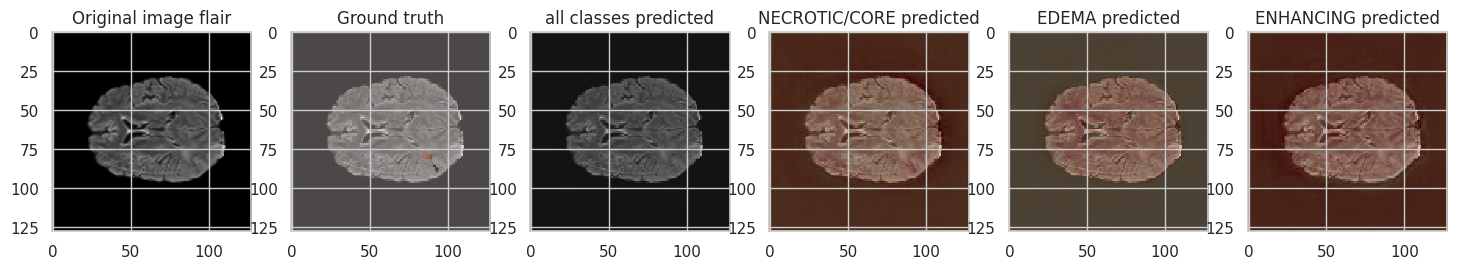

In [ ]:
showPredictsById(case=test_ids[0][-3:])

In [ ]:
file_list = os.listdir("/content/drive/My Drive/DL_Project/BraTs2020_extracted/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/")
print(file_list)

['BraTS20_Training_001', 'BraTS20_Training_002', 'BraTS20_Training_003', 'BraTS20_Training_004', 'BraTS20_Training_005', 'BraTS20_Training_006', 'BraTS20_Training_007', 'BraTS20_Training_008', 'BraTS20_Training_009', 'BraTS20_Training_010', 'BraTS20_Training_011', 'BraTS20_Training_012', 'BraTS20_Training_013', 'BraTS20_Training_014', 'BraTS20_Training_015', 'BraTS20_Training_016', 'BraTS20_Training_017', 'BraTS20_Training_018', 'BraTS20_Training_019', 'BraTS20_Training_020', 'BraTS20_Training_021', 'BraTS20_Training_022', 'BraTS20_Training_023', 'BraTS20_Training_024', 'BraTS20_Training_025', 'BraTS20_Training_026', 'BraTS20_Training_027', 'BraTS20_Training_028', 'BraTS20_Training_029', 'BraTS20_Training_030', 'BraTS20_Training_031', 'BraTS20_Training_032', 'BraTS20_Training_033', 'BraTS20_Training_034', 'BraTS20_Training_035', 'BraTS20_Training_036', 'BraTS20_Training_037', 'BraTS20_Training_038', 'BraTS20_Training_039', 'BraTS20_Training_040', 'BraTS20_Training_041', 'BraTS20_Traini

In [ ]:
showPredictsById(case=test_ids[1][-3:])

NameError: name 'showPredictsById' is not defined

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


<Figure size 1800x5000 with 0 Axes>

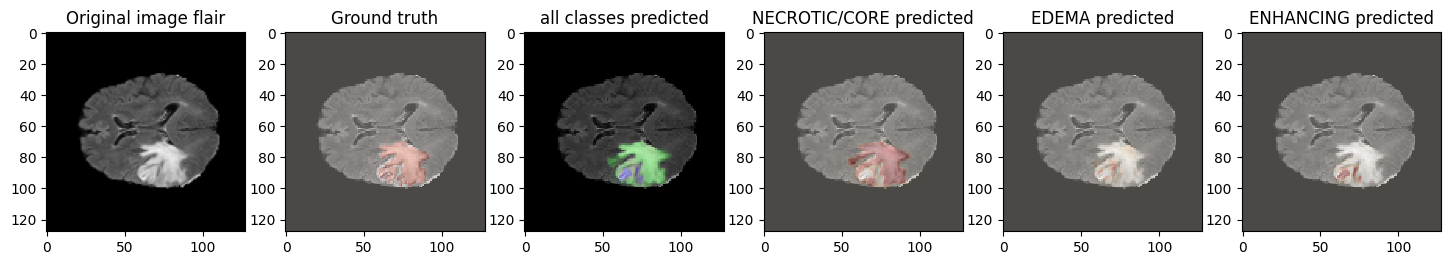

In [ ]:
showPredictsById(case=test_ids[2][-3:])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


<Figure size 1800x5000 with 0 Axes>

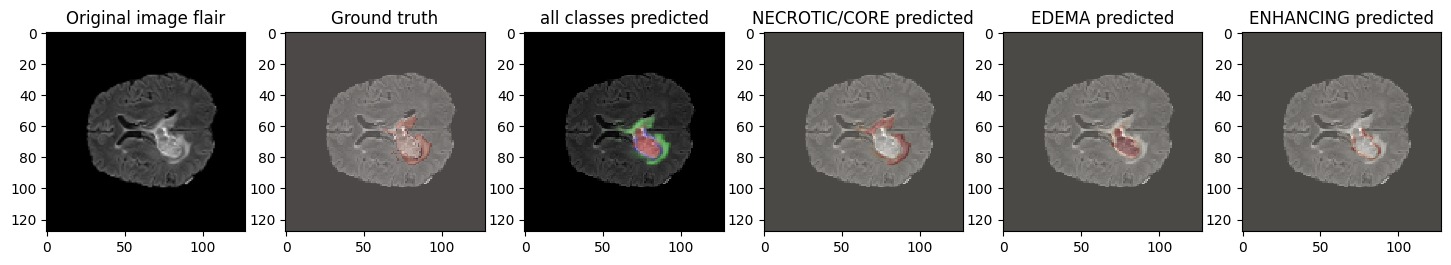

In [ ]:
showPredictsById(case=test_ids[3][-3:])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


<Figure size 1800x5000 with 0 Axes>

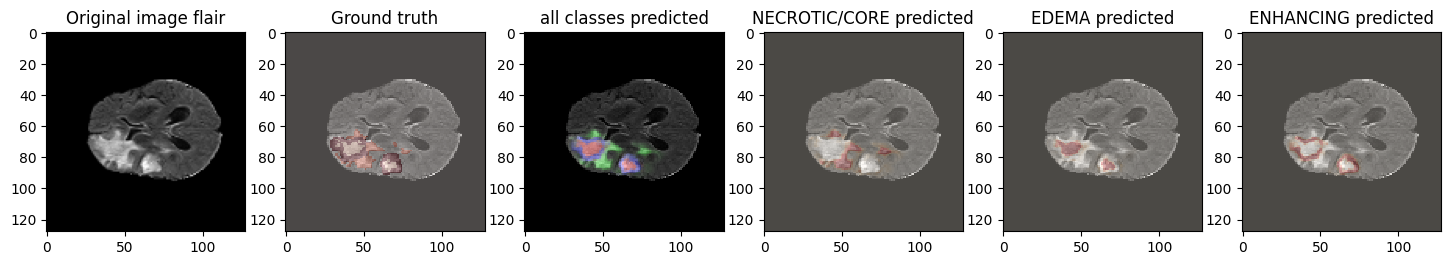

In [ ]:
showPredictsById(case=test_ids[4][-3:])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


<Figure size 1800x5000 with 0 Axes>

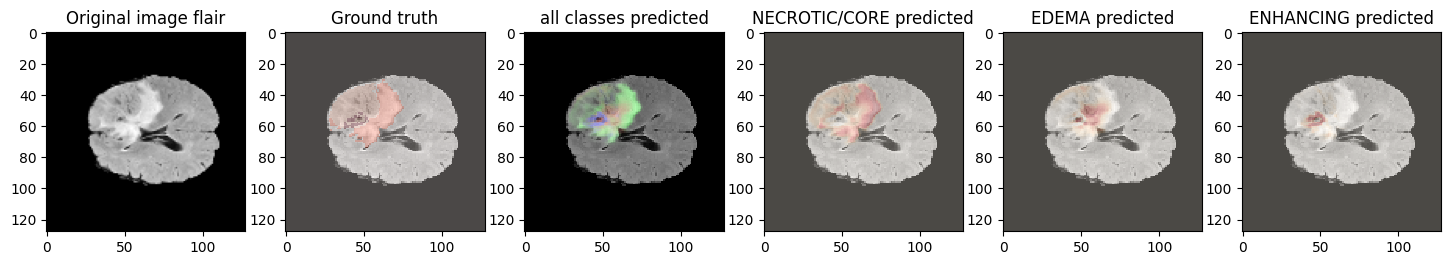

In [ ]:
showPredictsById(case=test_ids[5][-3:])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


<Figure size 1800x5000 with 0 Axes>

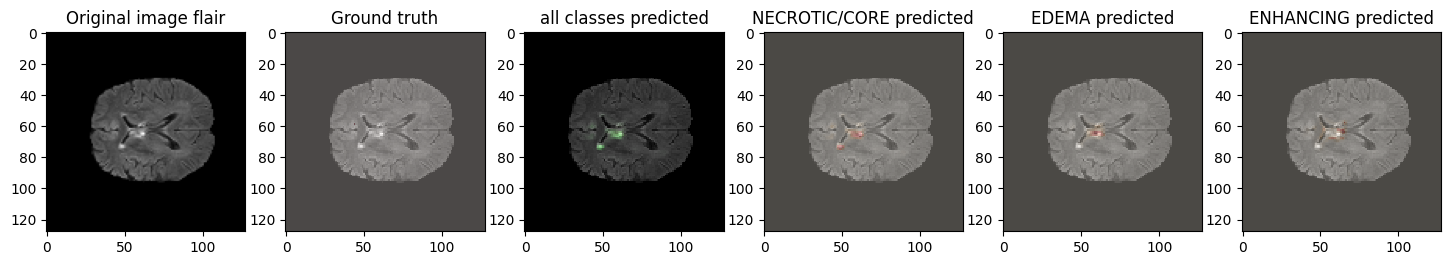

In [ ]:
showPredictsById(case=test_ids[6][-3:])

In [ ]:
def predict_segmentation(sample_path):
    # Load NIfTI (.nii) files of the sample (patient)
    t1ce_path = sample_path + '_t1ce.nii'
    flair_path = sample_path + '_flair.nii'

    # Extract the data from these paths
    t1ce = nib.load(t1ce_path).get_fdata()
    flair = nib.load(flair_path).get_fdata()

    # Create an empty array
    X = np.empty((VOLUME_SLICES, IMG_SIZE, IMG_SIZE, 2))

    # Perform the same operations as our DataGenerator, to keep the same input shape
    for j in range(VOLUME_SLICES):
        X[j,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
        X[j,:,:,1] = cv2.resize(t1ce[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))

    # Send our images to the CNN model and return predicted segmentation
    return model.predict(X/np.max(X), verbose=1)

In [ ]:
def show_predicted_segmentations(samples_list, slice_to_plot, cmap, norm):
    # Choose a random patient
    random_sample = random.choice(samples_list)

    # Get path of this patient
    random_sample_path = os.path.join(TRAIN_DATASET_PATH, random_sample, random_sample)

    # Predict patient's segmentation
    predicted_seg = predict_segmentation(random_sample_path)

    # Load patient's original segmentation (Ground truth)
    seg_path = random_sample_path + '_seg.nii'
    seg = nib.load(seg_path).get_fdata()

    # Resize original segmentation to the same dimensions of the predictions. (Add VOLUME_START_AT because original segmentation contains 155 slices vs only 75 for our prediction)
    seg=cv2.resize(seg[:,:,slice_to_plot+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_NEAREST)

    # Differentiate segmentations by their labels
    all = predicted_seg[slice_to_plot,:,:,1:4] # Deletion of class 0 (Keep only Core + Edema + Enhancing classes)
    zero = predicted_seg[slice_to_plot,:,:,0] # Isolation of class 0, Background (kind of useless, it is the opposite of the "all")
    first = predicted_seg[slice_to_plot,:,:,1] # Isolation of class 1, Core
    second = predicted_seg[slice_to_plot,:,:,2] # Isolation of class 2, Edema
    third = predicted_seg[slice_to_plot,:,:,3] # Isolation of class 3, Enhancing

    # Plot Original segmentation & predicted segmentation
    print("Patient number: ", random_sample)
    fig, axstest = plt.subplots(1, 6, figsize=(25, 20))

    # Original segmentation
    axstest[0].imshow(seg, cmap, norm)
    axstest[0].set_title('Original Segmentation')

    # Layers 1, 2, 3
    axstest[1].imshow(all, cmap, norm)
    axstest[1].set_title('Predicted Segmentation - all classes')

    # Layer 0
    axstest[2].imshow(zero)
    axstest[2].set_title('Predicted Segmentation - Not Tumor')

    # Layer 1
    axstest[3].imshow(first)
    axstest[3].set_title('Predicted Segmentation - Necrotic/Core')

    # Layer 2
    axstest[4].imshow(second)
    axstest[4].set_title('Predicted Segmentation - Edema')

    # Layer 3
    axstest[5].imshow(third)
    axstest[5].set_title('Predicted Segmentation - Enhancing')

    # Add space between subplots
    plt.subplots_adjust(wspace=0.8)

    plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Patient number:  BraTS20_Training_270


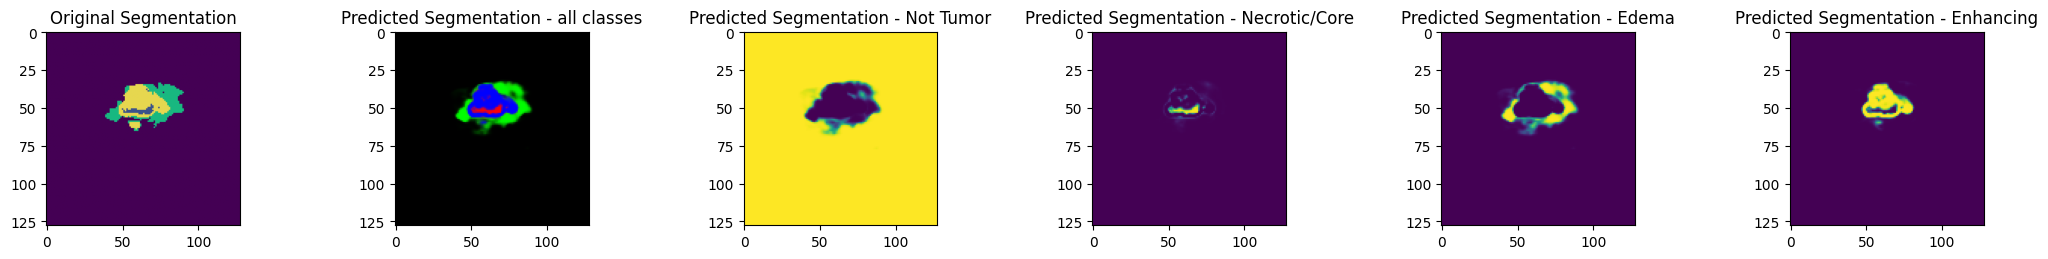

In [ ]:
import random
show_predicted_segmentations(test_ids, 60, cmap, norm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Patient number:  BraTS20_Training_037


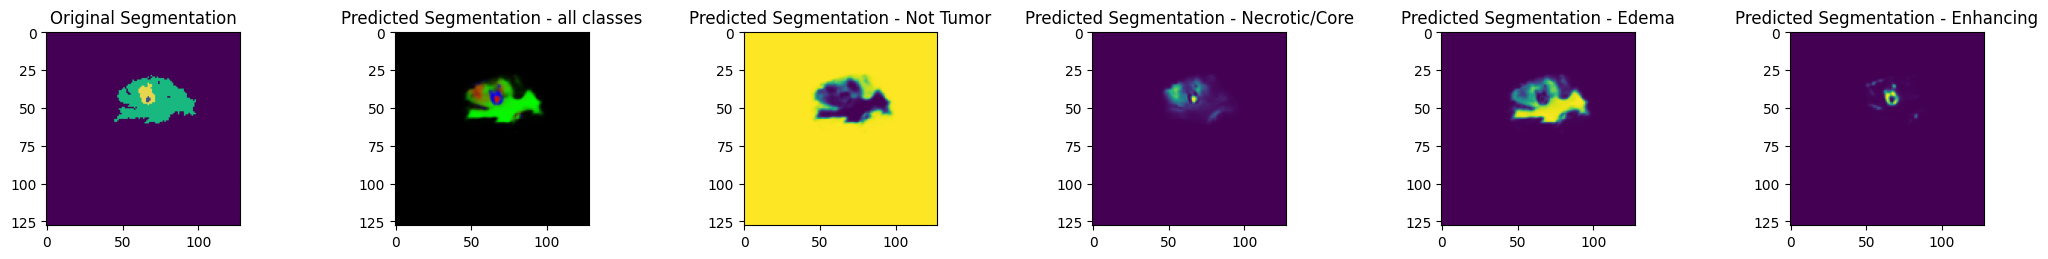

In [ ]:
show_predicted_segmentations(test_ids, 60, cmap, norm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Patient number:  BraTS20_Training_036


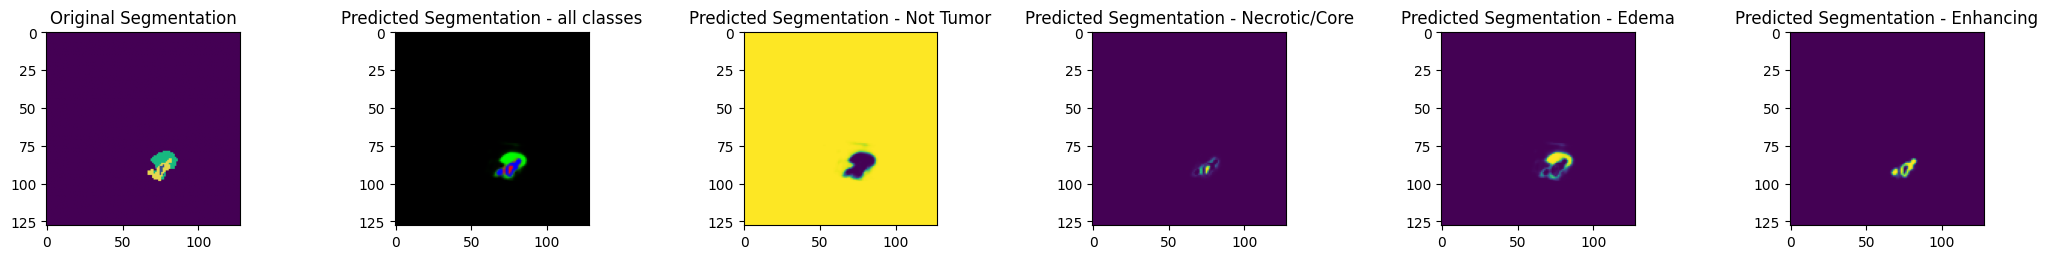

In [ ]:
show_predicted_segmentations(test_ids, 65, cmap, norm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


<Figure size 640x480 with 0 Axes>

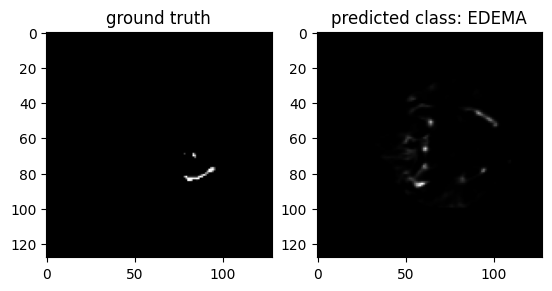

In [ ]:
case = test_ids[3][-3:]
path = f"/content/drive/My Drive/DL_Project/BraTs2020_extracted/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_{case}"
gt = nib.load(os.path.join(path, f'BraTS20_Training_{case}_seg.nii')).get_fdata()
p = predictByPath(path,case)

core = p[:,:,:,1]
edema= p[:,:,:,2]
enhancing = p[:,:,:,3]

i=40 # slice at
eval_class = 2 #     0 : 'NOT tumor',  1 : 'ENHANCING',    2 : 'CORE',    3 : 'WHOLE'

gt[gt != eval_class] = 1 # use only one class for per class evaluation

resized_gt = cv2.resize(gt[:,:,i+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))

plt.figure()
f, axarr = plt.subplots(1,2)
axarr[0].imshow(resized_gt, cmap="gray")
axarr[0].title.set_text('ground truth')
axarr[1].imshow(p[i,:,:,eval_class], cmap="gray")
axarr[1].title.set_text(f'predicted class: {SEGMENT_CLASSES[eval_class]}')
plt.show()

In [ ]:
# Evaluate the model on the test data
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy',tf.keras.metrics.MeanIoU(num_classes=4), dice_coef, precision, sensitivity, specificity, dice_coef_necrotic, dice_coef_edema, dice_coef_enhancing])

results = model.evaluate(test_generator, batch_size=100, callbacks= callbacks)

descriptions = ["Loss", "Accuracy", "MeanIOU", "Dice coefficient", "Precision", "Sensitivity", "Specificity", "Dice coef Necrotic", "Dice coef Edema", "Dice coef Enhancing"]

# Combine results list and descriptions list
results_list = zip(results, descriptions)

# Display each metric with its description
print("\nModel evaluation on the test set:")
print("==================================")
for i, (metric, description) in enumerate(results_list):
    print(f"{description} : {round(metric, 4)}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 333ms/step - accuracy: 0.9932 - dice_coef: 0.5794 - dice_coef_edema: 0.6618 - dice_coef_enhancing: 0.6344 - dice_coef_necrotic: 0.4038 - loss: 0.0212 - mean_io_u_13: 0.8373 - precision: 0.9942 - sensitivity: 0.9924 - specificity: 0.9981

Model evaluation on the test set:
Loss : 0.0234
Accuracy : 0.9924
MeanIOU : 0.84
Dice coefficient : 0.6183
Precision : 0.9936
Sensitivity : 0.9916
Specificity : 0.9979
Dice coef Necrotic : 0.5248
Dice coef Edema : 0.6903
Dice coef Enhancing : 0.6655


## **Different code lines for checking the model structure**

In [ ]:
train_ids_set = set(train_ids)
val_ids_set = set(val_ids)

overlap = train_ids_set.intersection(val_ids_set)
print("Overlap between training and validation sets:", overlap)

Overlap between training and validation sets: set()


In [ ]:
model.load_weights('best_model.h5')
print("Loaded saved model weights!")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'best_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

NameError: name 'y_train' is not defined

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy", tf.keras.metrics.MeanIoU(num_classes=4), dice_coef]
)

In [ ]:
preds = model.predict(X_batch)
print(f"Predictions shape: {preds.shape}, dtype: {preds.dtype}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step
Predictions shape: (100, 128, 128, 4), dtype: float32


In [ ]:
# Check the class distribution after one-hot encoding
import numpy as np

print("Unique values in y before one-hot encoding:", np.unique(Y_batch))

# Perform one-hot encoding
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(Y_batch))  # Ensure it matches your expected number of classes
Y_one_hot = to_categorical(Y_batch, num_classes=num_classes)

print("Shape of one-hot encoded Y:", Y_one_hot.shape)
print("Sample of one-hot encoded labels:\n", Y_one_hot[:5])  # Print first 5 examples


Unique values in y before one-hot encoding: [0. 1.]
Shape of one-hot encoded Y: (100, 128, 128, 4, 2)
Sample of one-hot encoded labels:
 [[[[[0. 1.]
    [1. 0.]
    [1. 0.]
    [1. 0.]]

   [[0. 1.]
    [1. 0.]
    [1. 0.]
    [1. 0.]]

   [[0. 1.]
    [1. 0.]
    [1. 0.]
    [1. 0.]]

   ...

   [[0. 1.]
    [1. 0.]
    [1. 0.]
    [1. 0.]]

   [[0. 1.]
    [1. 0.]
    [1. 0.]
    [1. 0.]]

   [[0. 1.]
    [1. 0.]
    [1. 0.]
    [1. 0.]]]


  [[[0. 1.]
    [1. 0.]
    [1. 0.]
    [1. 0.]]

   [[0. 1.]
    [1. 0.]
    [1. 0.]
    [1. 0.]]

   [[0. 1.]
    [1. 0.]
    [1. 0.]
    [1. 0.]]

   ...

   [[0. 1.]
    [1. 0.]
    [1. 0.]
    [1. 0.]]

   [[0. 1.]
    [1. 0.]
    [1. 0.]
    [1. 0.]]

   [[0. 1.]
    [1. 0.]
    [1. 0.]
    [1. 0.]]]


  [[[0. 1.]
    [1. 0.]
    [1. 0.]
    [1. 0.]]

   [[0. 1.]
    [1. 0.]
    [1. 0.]
    [1. 0.]]

   [[0. 1.]
    [1. 0.]
    [1. 0.]
    [1. 0.]]

   ...

   [[0. 1.]
    [1. 0.]
    [1. 0.]
    [1. 0.]]

   [[0. 1.]
    [1. 0.]
    [1. 0.]

In [ ]:
print("Number of batches in training_generator:", len(training_generator))

Number of batches in training_generator: 266


In [ ]:
print(f"Batch Size: {training_generator.batch_size}")

Batch Size: 1


In [ ]:
X, Y = training_generator.__getitem__(0)

print("X shape:", X.shape)  # Expected: (batch_size * num_slices, 128, 128, 2)
print("Y shape:", Y.shape)  # Expected: (batch_size * num_slices, 128, 128, 4)

Unique values in y before one-hot encoding: [0. 1. 2.]
Unique values in y after replacing 4 → 3: [0. 1. 2.]
X shape: (100, 128, 128, 2)
Y shape: (100, 128, 128, 4)


In [ ]:
print("Number of training patients:", len(train_ids))
print("Sample train ID:", train_ids[0] if len(train_ids) > 0 else "Empty dataset!")

Number of training patients: 266
Sample train ID: BraTS20_Training_057


In [ ]:

print("Validation X shape:", X_val.shape)
print("Validation Y shape:", Y_val.shape)
print("Unique values in validation Y:", np.unique(Y_val))

Unique values in y before one-hot encoding: [0. 1. 2. 4.]
Unique values in y after replacing 4 → 3: [0. 1. 2. 3.]
Validation X shape: (100, 128, 128, 2)
Validation Y shape: (100, 128, 128, 4)
Unique values in validation Y: [0. 1.]


In [ ]:
X_sample, y_sample = training_generator.__getitem__(0)  # Get first batch

print("X shape:", X_sample.shape)
print("y shape:", y_sample.shape)  # Check segmentation mask shape
print("Unique values in y:", np.unique(y_sample))  # Print unique labels


Unique values in y before one-hot encoding: [0. 1. 2.]
Unique values in y after replacing 4 → 3: [0. 1. 2.]
X shape: (100, 128, 128, 2)
y shape: (100, 128, 128, 4)
Unique values in y: [0. 1.]


In [ ]:
print("Number of training samples:", len(train_ids))
print("Sample training ID:", train_ids[0] if len(train_ids) > 0 else "Dataset is empty!")
print("Number of validation samples:", len(val_ids))
print("Sample validation ID:", val_ids[0] if len(val_ids) > 0 else "Dataset is empty!")


Number of training samples: 266
Sample training ID: BraTS20_Training_057
Number of validation samples: 56
Sample validation ID: BraTS20_Training_144


In [ ]:
print("Model expects input shape:", model.input_shape)
print("Model expects output shape:", model.output_shape)

Model expects input shape: (None, 128, 128, 2)
Model expects output shape: (None, 128, 128, 4)


In [ ]:
print("X_dummy shape:", X_dummy.shape)
print("Y_dummy shape:", Y_dummy.shape)

X_dummy shape: (10, 128, 128, 2)
Y_dummy shape: (10, 128, 128, 4)
